# Tennis analysis

### Question or problem definition

We want to see if we can create a prediction model that can predict whether a player will win a match or not, based on different statistics

### Acquire training and testing data

import librairies :

In [961]:
# dataframe manipulation
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Acquire data from csv :

We want to collect a list of matches with the following information :
- match_id
- date
- surface
- best_of (3 sets win => best_of = 5)
- winner_rank
- loser_rank
- winner_rank_points
- loser_rank_points
- winner_elo_rating
- loser_elo_rating
- winner_age
- loser_age
- winner_height
- loser_height

>SELECT match_id, date, surface, best_of, winner_rank, loser_rank, winner_rank_points, loser_rank_points, winner_elo_rating, loser_elo_rating, winner_age, loser_age, winner_height, loser_height FROM match;

We want to add stats before matches to it :

For example if we want to get aces from nadal given a date we have to do :
> SELECT AVG(ps.p_ace), AVG(ps.o_ace) FROM (SELECT p_matches, p_ace, o_matches, o_ace, match_id, date, player_id FROM player_match_stats_v WHERE player_id=4742 AND date <= '2016/01/01') ps;

final statement to get 2018 matches with their stats :

>SELECT pms.match_id, pms.date, pms.surface, pms.level, pms.round, pms.best_of, pms.player_id, pms.opponent_id, pms.player_rank, pms.opponent_rank, pms.player_elo_rating, pms.opponent_elo_rating, pms.player_age, pms.opponent_age, pms.player_height, pms.opponent_height, pms.outcome, pms.p_matches, pms.o_matches, pms.p_sets, pms.o_sets, pms.p_games, pms.o_games, pms.p_tbs, pms.o_tbs, pms.p_ace, pms.p_df, pms.p_sv_pt, pms.p_1st_in, pms.p_1st_won, pms.p_2nd_won, pms.p_sv_gms, pms.p_bp_sv, pms.p_bp_fc, pms.o_ace, pms.o_df, pms.o_sv_pt, pms.o_1st_in, pms.o_1st_won, pms.o_2nd_won, pms.o_sv_gms, pms.o_bp_sv, pms.o_bp_fc, pms.minutes, pms.p_upsets, pms.o_upsets, ps.p_avg_ace, ps.p_avg_df, ps.p_avg_sv_pt, ps.p_avg_1st_in, ps.p_avg_1st_won, ps.p_avg_2nd_won, ps.p_avg_sv_gms, ps.p_avg_bp_sv, ps.p_avg_bp_fc, ps.o_avg_ace, ps.o_avg_df, ps.o_avg_sv_pt, ps.o_avg_1st_in, ps.o_avg_1st_won, ps.o_avg_2nd_won, ps.o_avg_sv_gms, ps.o_avg_bp_sv, ps.o_avg_bp_fc FROM player_match_stats_v pms LEFT JOIN LATERAL (SELECT ROUND(AVG(p_ace), 2) p_avg_ace, ROUND(AVG(p_df), 2) p_avg_df, ROUND(AVG(p_sv_pt), 2) p_avg_sv_pt, ROUND(AVG(p_1st_in), 2) p_avg_1st_in, ROUND(AVG(p_1st_won), 2) p_avg_1st_won, ROUND(AVG(p_2nd_won), 2) p_avg_2nd_won, ROUND(AVG(p_sv_gms), 2) p_avg_sv_gms, ROUND(AVG(p_bp_sv), 2) p_avg_bp_sv, ROUND(AVG(p_bp_fc), 2) p_avg_bp_fc, ROUND(AVG(o_ace), 2) o_avg_ace, ROUND(AVG(o_df), 2) o_avg_df, ROUND(AVG(o_sv_pt), 2) o_avg_sv_pt, ROUND(AVG(o_1st_in), 2) o_avg_1st_in, ROUND(AVG(o_1st_won), 2) o_avg_1st_won, ROUND(AVG(o_2nd_won), 2) o_avg_2nd_won, ROUND(AVG(o_sv_gms), 2) o_avg_sv_gms, ROUND(AVG(o_bp_sv), 2) o_avg_bp_sv, ROUND(AVG(o_bp_fc), 2) o_avg_bp_fc, player_id FROM player_match_stats_v WHERE date <= pms.date GROUP BY player_id) ps ON (pms.player_id=ps.player_id) WHERE pms.date >= '2018-01-01' AND pms.date <='2018-12-31';

In [962]:
tennis = pd.read_csv('2018 matches/matches.csv', delimiter=';')

In [963]:
tennis.head()

,match_id,date,surface,level,round,best_of,player_id,opponent_id,player_rank,opponent_rank,...,p_avg_bp_fc,o_avg_ace,o_avg_df,o_avg_sv_pt,o_avg_1st_in,o_avg_1st_won,o_avg_2nd_won,o_avg_sv_gms,o_avg_bp_sv,o_avg_bp_fc
0,166985,06/04/2018,C,D,RR,3,6030,11769,87.0,64.0,...,7.58,6.20,2.60,76.18,46.70,33.05,14.95,12.28,3.33,6.03
1,167084,09/04/2018,C,B,R32,3,6364,6196,26.0,65.0,...,6.69,7.55,3.74,82.57,49.97,36.63,16.29,12.95,4.18,6.77
2,167085,09/04/2018,C,B,R32,3,5420,4311,93.0,62.0,...,9.05,6.82,3.03,85.92,50.68,36.20,17.91,13.09,4.97,7.82
3,167086,09/04/2018,C,B,R32,3,4291,5902,91.0,61.0,...,7.98,7.96,3.22,80.63,48.48,35.95,16.59,12.79,4.20,6.56
4,167087,09/04/2018,C,B,R32,3,4994,3893,55.0,57.0,...,7.27,5.12,2.70,77.29,48.82,34.54,14.85,12.05,3.75,6.16


In [964]:
tennis.columns

Index(['match_id', 'date', 'surface', 'level', 'round', 'best_of', 'player_id',
       'opponent_id', 'player_rank', 'opponent_rank', 'player_elo_rating',
       'opponent_elo_rating', 'player_age', 'opponent_age', 'player_height',
       'opponent_height', 'outcome', 'p_matches', 'o_matches', 'p_sets',
       'o_sets', 'p_games', 'o_games', 'p_tbs', 'o_tbs', 'p_ace', 'p_df',
       'p_sv_pt', 'p_1st_in', 'p_1st_won', 'p_2nd_won', 'p_sv_gms', 'p_bp_sv',
       'p_bp_fc', 'o_ace', 'o_df', 'o_sv_pt', 'o_1st_in', 'o_1st_won',
       'o_2nd_won', 'o_sv_gms', 'o_bp_sv', 'o_bp_fc', 'minutes', 'p_upsets',
       'o_upsets', 'p_avg_ace', 'p_avg_df', 'p_avg_sv_pt', 'p_avg_1st_in',
       'p_avg_1st_won', 'p_avg_2nd_won', 'p_avg_sv_gms', 'p_avg_bp_sv',
       'p_avg_bp_fc', 'o_avg_ace', 'o_avg_df', 'o_avg_sv_pt', 'o_avg_1st_in',
       'o_avg_1st_won', 'o_avg_2nd_won', 'o_avg_sv_gms', 'o_avg_bp_sv',
       'o_avg_bp_fc'],
      dtype='object')

In [965]:
tennis[tennis['match_id'] == 166985]

,match_id,date,surface,level,round,best_of,player_id,opponent_id,player_rank,opponent_rank,...,p_avg_bp_fc,o_avg_ace,o_avg_df,o_avg_sv_pt,o_avg_1st_in,o_avg_1st_won,o_avg_2nd_won,o_avg_sv_gms,o_avg_bp_sv,o_avg_bp_fc
0,166985,06/04/2018,C,D,RR,3,6030,11769,87.0,64.0,...,7.58,6.20,2.6,76.18,46.70,33.05,14.95,12.28,3.33,6.03
390,166985,06/04/2018,C,D,RR,3,11769,6030,64.0,87.0,...,6.85,5.12,3.7,85.24,51.61,38.42,18.42,13.55,3.88,5.94


In [966]:
tennis['match_id'].nunique()

2943

tennis_non_duplicate = tennis.drop_duplicates(subset='match_id')

tennis_non_duplicate.shape

In [967]:
from sklearn.model_selection import train_test_split

In [968]:
train_df = pd.read_csv('2018 matches/matches.csv', delimiter=';')
train_df, test_df = train_test_split(tennis)
print("train shape : ", train_df.shape)
print("train test : ", test_df.shape)

train shape :  (4414, 64)
train test :  (1472, 64)


Save those to csv :

In [969]:
train_df.to_csv('2018 matches/tennis_matches_stats_train.csv', index=False)
test_df.to_csv('2018 matches/tennis_matches_stats_test.csv', index=False)

Declare new dataframes :

In [970]:
train_df = pd.read_csv('2018 matches/tennis_matches_stats_train.csv')
test_df = pd.read_csv('2018 matches/tennis_matches_stats_test.csv')
combine = [train_df, test_df]

### Analyze by describing data

Which features are available in the dataset?

In [971]:
print(train_df.columns.values)

['match_id' 'date' 'surface' 'level' 'round' 'best_of' 'player_id'
 'opponent_id' 'player_rank' 'opponent_rank' 'player_elo_rating'
 'opponent_elo_rating' 'player_age' 'opponent_age' 'player_height'
 'opponent_height' 'outcome' 'p_matches' 'o_matches' 'p_sets' 'o_sets'
 'p_games' 'o_games' 'p_tbs' 'o_tbs' 'p_ace' 'p_df' 'p_sv_pt' 'p_1st_in'
 'p_1st_won' 'p_2nd_won' 'p_sv_gms' 'p_bp_sv' 'p_bp_fc' 'o_ace' 'o_df'
 'o_sv_pt' 'o_1st_in' 'o_1st_won' 'o_2nd_won' 'o_sv_gms' 'o_bp_sv'
 'o_bp_fc' 'minutes' 'p_upsets' 'o_upsets' 'p_avg_ace' 'p_avg_df'
 'p_avg_sv_pt' 'p_avg_1st_in' 'p_avg_1st_won' 'p_avg_2nd_won'
 'p_avg_sv_gms' 'p_avg_bp_sv' 'p_avg_bp_fc' 'o_avg_ace' 'o_avg_df'
 'o_avg_sv_pt' 'o_avg_1st_in' 'o_avg_1st_won' 'o_avg_2nd_won'
 'o_avg_sv_gms' 'o_avg_bp_sv' 'o_avg_bp_fc']


Categorical :
- Nominal :
    - Surface
- Ordinal :
    - o_matches
    - Level
    - p_matches

Numerical :
- Continous :
    - player_rank, opponent_rank
    - player_age, opponent_age
- Discrete
    - Best_of
    - player_elo_rating, opponent_elo_rating
    - player_height, opponent_height
    
Mixed data types :
- Date
- Round

In [972]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4414 entries, 0 to 4413
Data columns (total 64 columns):
match_id               4414 non-null int64
date                   4414 non-null object
surface                4414 non-null object
level                  4414 non-null object
round                  4414 non-null object
best_of                4414 non-null int64
player_id              4414 non-null int64
opponent_id            4414 non-null int64
player_rank            4394 non-null float64
opponent_rank          4389 non-null float64
player_elo_rating      4414 non-null int64
opponent_elo_rating    4414 non-null int64
player_age             4412 non-null float64
opponent_age           4411 non-null float64
player_height          2805 non-null float64
opponent_height        2780 non-null float64
outcome                102 non-null object
p_matches              4414 non-null int64
o_matches              4414 non-null int64
p_sets                 4414 non-null int64
o_sets           

Features contain blank, null or empty values :
- train :
    - opponent_height
    - player_height
    - outcome
- test :
    - opponent_height
    - player_height
    - outcome

### Verify how representative is training dataset

In [973]:
train_df.describe()

,match_id,best_of,player_id,opponent_id,player_rank,opponent_rank,player_elo_rating,opponent_elo_rating,player_age,opponent_age,...,p_avg_bp_fc,o_avg_ace,o_avg_df,o_avg_sv_pt,o_avg_1st_in,o_avg_1st_won,o_avg_2nd_won,o_avg_sv_gms,o_avg_bp_sv,o_avg_bp_fc
count,4414.000000,4414.000000,4414.000000,4414.000000,4394.000000,4389.000000,4414.000000,4414.000000,4412.000000,4411.000000,...,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000
mean,167541.115088,3.386498,9120.169008,9203.397599,100.540965,101.676236,1917.116221,1914.558677,27.619036,27.615381,...,6.936221,6.061361,3.045073,80.532695,49.074372,35.170304,16.040163,12.629610,4.069807,6.717824
std,857.445304,0.789782,9789.109213,9852.730213,183.324469,183.793001,169.629871,169.835515,4.695053,4.723553,...,1.397965,1.580709,0.523534,6.233168,4.176999,3.428327,1.600912,0.928972,0.718120,1.194339
min,166073.000000,3.000000,644.000000,644.000000,1.000000,1.000000,1455.000000,1458.000000,14.530000,14.530000,...,0.000000,0.000000,0.000000,29.000000,17.000000,6.000000,2.000000,6.000000,0.000000,0.000000
25%,166789.000000,3.000000,4914.000000,4894.000000,27.000000,28.000000,1813.000000,1811.000000,23.920000,23.730000,...,6.130000,5.017500,2.800000,78.280000,47.430000,33.487500,15.290000,12.250000,3.767500,6.120000
50%,167540.000000,3.000000,5564.000000,5539.000000,57.000000,58.000000,1904.500000,1904.000000,27.840000,27.900000,...,6.910000,5.950000,3.000000,80.280000,48.650000,35.000000,15.900000,12.540000,4.080000,6.710000
75%,168279.000000,3.000000,6315.000000,6354.000000,98.000000,99.000000,2013.000000,2006.000000,30.980000,31.065000,...,7.770000,7.050000,3.192500,82.570000,50.570000,36.452500,16.690000,12.940000,4.420000,7.390000
max,169046.000000,5.000000,52643.000000,52643.000000,1902.000000,1821.000000,2473.000000,2473.000000,39.838467,39.838467,...,17.000000,23.000000,10.000000,123.330000,83.000000,59.000000,31.000000,19.000000,12.000000,15.500000


In [974]:
train_df[train_df['best_of']==3]['match_id'].count() / (train_df['match_id'].count())

0.8067512460353421

We have 80% of the matches that were in best of 3.

In [975]:
train_df.describe(include=['O'])

,date,surface,level,round,outcome
count,4414,4414,4414,4414,102
unique,44,3,6,8,1
top,15/01/2018,H,B,R32,RET
freq,198,2589,1792,1443,102


- 3 different values for surface (with top H)
- 6 different values for level (with top == B)
- There were 50 withdrawals

In [976]:
train_df[train_df['surface'] == 'H']['match_id'].count() / train_df['match_id'].count()

0.5865428183053919

We have 58% of the matches that were in Hard

### Asumptions based on data analysis

- Correlating : We want to know how well does each feature correlate with winning a match. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.
- Completing : 
    - 
- Correcting : 
    - opponent_height and player_height features may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
    - player_id and opponent_id features may be dropped from training dataset as it does not contribute to predict.
- Creating : 
    - We may want to create a new feature called ace_matches based on p_ace and o_ace.

- Classifying :


# Wrangle data

Let us now execute our decisions and assumptions for correcting, creating, and completing goals.

### Correcting by dropping features

In [977]:
train_df = train_df.drop(['minutes','p_upsets','o_upsets','p_tbs','o_tbs','p_sets','o_sets','p_games','o_games','player_id','opponent_id','match_id','date','player_height','opponent_height','outcome','o_matches'], axis=1)
test_df = test_df.drop(['minutes','p_upsets','o_upsets','p_tbs','o_tbs','p_sets','o_sets','p_games','o_games','player_id','opponent_id','match_id','date','player_height','opponent_height','outcome','o_matches'], axis=1)
combine = [train_df, test_df]

### Creating new feature extracting from existing

In [978]:
for dataset in combine:
    dataset['dif_rank'] = dataset['player_rank'] - dataset['opponent_rank']
    dataset['dif_elo_rating'] = dataset['player_elo_rating'] - dataset['opponent_elo_rating']
    dataset['dif_ace'] = dataset['p_ace'] - dataset['o_ace']
    dataset['dif_df'] = dataset['p_df'] - dataset['o_df']
    dataset['dif_sv_pt'] = dataset['p_sv_pt'] - dataset['o_sv_pt']
    dataset['dif_1st_in'] = dataset['p_1st_in'] - dataset['o_1st_in']
    dataset['dif_1st_won'] = dataset['p_1st_won'] - dataset['o_1st_won']
    dataset['dif_2nd_won'] = dataset['p_2nd_won'] - dataset['o_2nd_won']
    dataset['dif_sv_gms'] = dataset['p_sv_gms'] - dataset['o_sv_gms']
    dataset['dif_bp_sv'] = dataset['p_bp_sv'] - dataset['o_bp_sv']
    dataset['dif_bp_fc'] = dataset['p_bp_fc'] - dataset['o_bp_fc']
    
train_df = train_df.drop(['player_rank','opponent_rank','player_elo_rating','opponent_elo_rating','p_ace','o_ace','p_df','o_df','p_sv_pt','o_sv_pt','p_1st_in',
                          'o_1st_in','p_1st_won','o_1st_won','p_2nd_won','o_2nd_won','p_sv_gms','o_sv_gms','p_bp_sv','o_bp_sv','p_bp_fc','o_bp_fc'], axis=1)
test_df = test_df.drop(['player_rank','opponent_rank','player_elo_rating','opponent_elo_rating','p_ace','o_ace','p_df','o_df','p_sv_pt','o_sv_pt','p_1st_in',
                          'o_1st_in','p_1st_won','o_1st_won','p_2nd_won','o_2nd_won','p_sv_gms','o_sv_gms','p_bp_sv','o_bp_sv','p_bp_fc','o_bp_fc'], axis=1)

In [979]:
combine = [train_df, test_df]
for dataset in combine:
    dataset['dif_avg_ace'] = dataset['p_avg_ace'] - dataset['o_avg_ace']
    dataset['dif_avg_df'] = dataset['p_avg_df'] - dataset['o_avg_df']
    dataset['dif_avg_sv_pt'] = dataset['p_avg_sv_pt'] - dataset['o_avg_sv_pt']
    dataset['dif_avg_1st_in'] = dataset['p_avg_1st_in'] - dataset['o_avg_1st_in']
    dataset['dif_avg_1st_won'] = dataset['p_avg_1st_won'] - dataset['o_avg_1st_won']
    dataset['dif_avg_2nd_won'] = dataset['p_avg_2nd_won'] - dataset['o_avg_2nd_won']
    dataset['dif_avg_sv_gms'] = dataset['p_avg_sv_gms'] - dataset['o_avg_sv_gms']
    dataset['dif_avg_bp_sv'] = dataset['p_avg_bp_sv'] - dataset['o_avg_bp_sv']
    dataset['dif_avg_bp_fc'] = dataset['p_avg_bp_fc'] - dataset['o_avg_bp_fc']
    
train_df = train_df.drop(['p_avg_ace','o_avg_ace','p_avg_df','o_avg_df','p_avg_sv_pt','o_avg_sv_pt','p_avg_1st_in',
                          'o_avg_1st_in','p_avg_1st_won','o_avg_1st_won','p_avg_2nd_won','o_avg_2nd_won','p_avg_sv_gms','o_avg_sv_gms','p_avg_bp_sv','o_avg_bp_sv','p_avg_bp_fc','o_avg_bp_fc'], axis=1)
test_df = test_df.drop(['p_avg_ace','o_avg_ace','p_avg_df','o_avg_df','p_avg_sv_pt','o_avg_sv_pt','p_avg_1st_in',
                          'o_avg_1st_in','p_avg_1st_won','o_avg_1st_won','p_avg_2nd_won','o_avg_2nd_won','p_avg_sv_gms','o_avg_sv_gms','p_avg_bp_sv','o_avg_bp_sv','p_avg_bp_fc','o_avg_bp_fc'], axis=1)

In [980]:
train_df.head()

,surface,level,round,best_of,player_age,opponent_age,p_matches,dif_rank,dif_elo_rating,dif_ace,...,dif_bp_fc,dif_avg_ace,dif_avg_df,dif_avg_sv_pt,dif_avg_1st_in,dif_avg_1st_won,dif_avg_2nd_won,dif_avg_sv_gms,dif_avg_bp_sv,dif_avg_bp_fc
0,C,G,R64,5,21.53,29.00,1,-75.0,259,11.0,...,-12.0,-1.32,-0.65,-0.75,0.18,-0.81,0.36,-0.15,-0.19,-0.25
1,G,A,QF,3,21.59,34.32,1,-16.0,121,3.0,...,-8.0,-1.23,-0.67,-0.88,0.14,-0.80,0.38,-0.16,-0.22,-0.31
2,H,B,R16,3,22.52,27.04,1,-61.0,198,2.0,...,-9.0,1.94,0.50,2.07,-0.36,-0.12,0.93,-0.13,-0.13,-0.23
3,H,A,SF,3,21.28,19.96,1,-29.0,237,3.0,...,-7.0,2.53,0.87,0.06,1.29,2.04,-0.09,0.00,-0.36,-1.08
4,H,B,R32,3,27.23,24.64,1,40.0,-166,8.0,...,-10.0,2.93,0.34,2.47,-0.06,-0.05,-0.16,0.00,1.25,1.71


In [981]:
test_df.head()

,surface,level,round,best_of,player_age,opponent_age,p_matches,dif_rank,dif_elo_rating,dif_ace,...,dif_bp_fc,dif_avg_ace,dif_avg_df,dif_avg_sv_pt,dif_avg_1st_in,dif_avg_1st_won,dif_avg_2nd_won,dif_avg_sv_gms,dif_avg_bp_sv,dif_avg_bp_fc
0,H,B,R32,3,21.62,34.65,1,33.0,-102,-12.0,...,-3.0,-3.74,-0.05,-2.88,-0.55,-0.53,-0.06,-0.16,-0.85,-1.29
1,C,B,R16,3,25.02,25.79,0,46.0,-1,-3.0,...,3.0,0.05,0.81,0.93,2.89,1.22,-1.28,-0.02,0.19,0.27
2,C,B,R32,3,32.20,22.86,0,-3.0,109,1.0,...,2.0,3.61,-0.27,-0.98,-0.56,1.01,-1.24,-0.07,-0.02,-0.05
3,H,G,R128,5,36.70,23.63,1,78.0,-279,11.0,...,-3.0,-1.47,0.05,0.75,-1.20,-2.21,0.05,-0.13,0.29,1.04
4,C,D,RR,3,23.49,33.00,1,110.0,-77,3.0,...,-3.0,2.08,0.46,7.16,3.08,1.92,-1.00,0.15,1.85,2.77


### Converting a categorical feature

In [982]:
train_df['surface'].unique()

array(['C', 'G', 'H'], dtype=object)

We have 3 types of surface : H, C and G

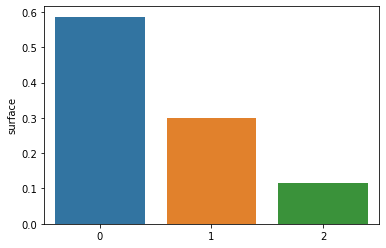

In [983]:
combine = [train_df, test_df]
for dataset in combine:
    dataset['surface'] = dataset['surface'].map( {'H': 0, 'C': 1, 'G':2} ).astype(int)

sns.barplot(x = np.sort(train_df['surface'].unique()), y = train_df['surface'].value_counts()/train_df['surface'].count())

In [984]:
train_df['level'].unique()

array(['G', 'A', 'B', 'M', 'D', 'F'], dtype=object)

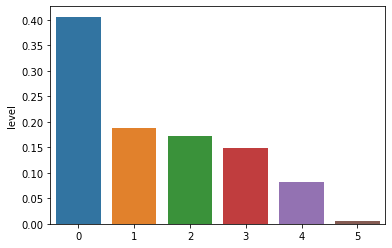

In [985]:
for dataset in combine:
    dataset['level'] = dataset['level'].map( {'A': 0, 'B': 1, 'D': 2, 'F': 3, 'G': 4, 'M': 5} ).astype(int)
sns.barplot(x = np.sort(train_df['level'].unique()), y = train_df['level'].value_counts()/train_df['level'].count())

In [986]:
train_df['round'].unique()

array(['R64', 'QF', 'R16', 'SF', 'R32', 'RR', 'R128', 'F'], dtype=object)

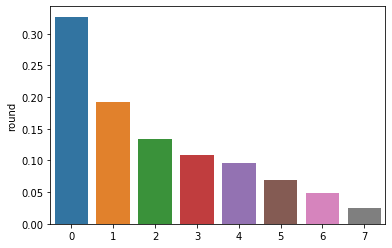

In [987]:
for dataset in combine:
    dataset['round'] = dataset['round'].map( {'RR': 0, 'R128': 1, 'R64': 2, 'R32': 3, 'R16': 4, 'QF': 5, 'SF': 6, 'F': 7} ).astype(int)
sns.barplot(x = np.sort(train_df['round'].unique()), y = train_df['round'].value_counts()/train_df['round'].count())

### Model, predict and solve

In [988]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [989]:
X_train = train_df.drop("p_matches", axis=1)
Y_train = train_df['p_matches']
X_test  = test_df.drop("p_matches", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((4414, 26), (4414,), (1472, 26))